# Importing libraries

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

# EDA

In [187]:
data = pd.read_csv("/content/heart_.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [188]:
data.shape

(918, 12)

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [190]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [191]:
# correlation=data.corr()
# correlation

In [192]:
#heatmap
# plt.figure(figsize=(11.8,6.5))
# sns.heatmap(correlation, cmap="magma", annot=True)

In [193]:
data.isnull().sum().sum()

0

In [194]:
data.isnull().values.any() #IF there any null value reture True otherwise false

False

Text(0.5, 1.0, 'Distribution of target class')

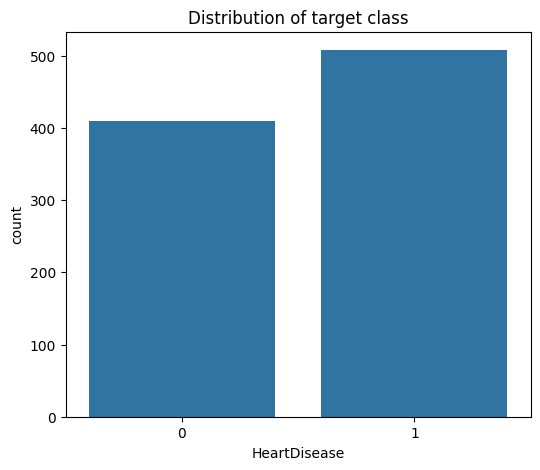

In [195]:
plt.figure(figsize=(6, 5))
sns.countplot(x='HeartDisease', data=data)
plt.title("Distribution of target class")

In [196]:
le_model = LabelEncoder()

data['Sex'] = le_model.fit_transform(data['Sex'])
data['ChestPainType'] = le_model.fit_transform(data['ChestPainType'])
data['RestingECG'] = le_model.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le_model.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le_model.fit_transform(data['ST_Slope'])

In [197]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [198]:
gender_variable = 'Sex'

# Calculate the number of male patients
male_patients = data[data[gender_variable] == 1].shape[0]
female_patients = data[data[gender_variable] == 0].shape[0]
print(f'Number of male patients: {male_patients}')
print(f'Number of female patients: {female_patients}')


target_variable = 'HeartDisease'
healthy_patients = data[data[target_variable] == 0].shape[0]
print(f'Number of healthy patients: {healthy_patients}')
disease = 918 - healthy_patients
print(f'Number of unhealhty: {disease}')



# Calculate the number of male healthy patients
male_healthy_patients = data[(data[target_variable] == 0) & (data[gender_variable] == 1)].shape[0]
print(f'Number of male healthy patients: {male_healthy_patients}')

# Calculate the number of female healthy patients
female_healthy_patients = data[(data[target_variable] == 0) & (data[gender_variable] == 0)].shape[0]
print(f'Number of female healthy patients: {female_healthy_patients}')


# Unhealthy patient male
male_unhealthy_patients = data[(data[target_variable] == 1) & (data[gender_variable] == 1)].shape[0]
print(f'Male unhealthy (having heart disease) patients: {male_unhealthy_patients}')


# Calculate the number of female unhealthy patients
female_unhealthy_patients = data[(data[target_variable] == 1) & (data[gender_variable] == 0)].shape[0]
print(f'Female unhealthy (having heart disease) patients: {female_unhealthy_patients}')

Number of male patients: 725
Number of female patients: 193
Number of healthy patients: 410
Number of unhealhty: 508
Number of male healthy patients: 267
Number of female healthy patients: 143
Male unhealthy (having heart disease) patients: 458
Female unhealthy (having heart disease) patients: 50


Text(0.5, 1.0, 'Correlation of numerical attributes with HeartDisease')

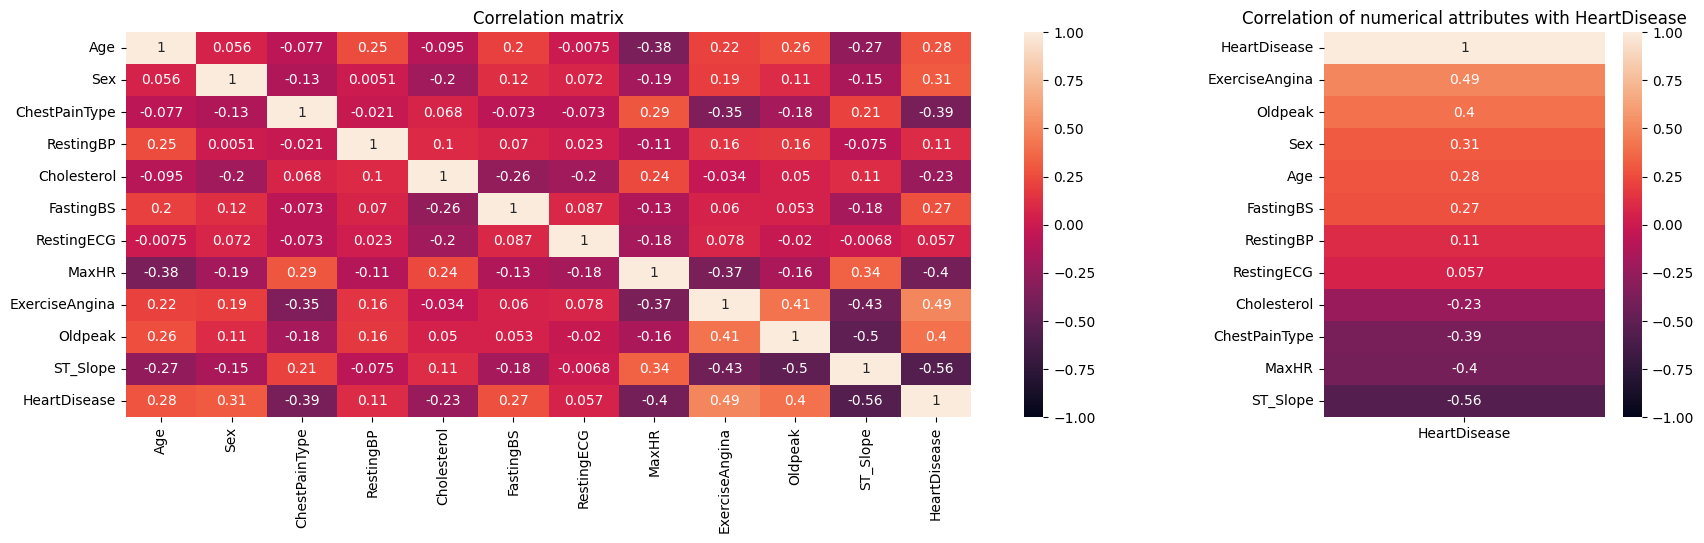

In [199]:
f, axs = plt.subplots(1, 2, figsize=(20, 5), width_ratios=[3, 1])

sns.heatmap(data=data.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True, ax=axs[0])
axs[0].set_title("Correlation matrix")

sns.heatmap(data=data.corr(method="pearson", numeric_only=True)[["HeartDisease"]].sort_values('HeartDisease', ascending=False), vmin=-1, vmax=1, annot=True, ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with HeartDisease")

# Data PreProcessing

In [200]:
X=data.drop('HeartDisease', axis=1)

y=data['HeartDisease']

In [201]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [202]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [203]:
data.select_dtypes(include="object").columns

Index([], dtype='object')

Data Transformation

In [204]:
# le_model = LabelEncoder()

# X['Sex'] = le_model.fit_transform(X['Sex'])
# X['ChestPainType'] = le_model.fit_transform(X['ChestPainType'])
# X['RestingECG'] = le_model.fit_transform(X['RestingECG'])
# X['ExerciseAngina'] = le_model.fit_transform(X['ExerciseAngina'])
# X['ST_Slope'] = le_model.fit_transform(X['ST_Slope'])

In [205]:
# X

In [206]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [207]:
X

array([[0.24489796, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       [0.42857143, 0.        , 0.66666667, ..., 0.        , 0.40909091,
        0.5       ],
       [0.18367347, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       ...,
       [0.59183673, 1.        , 0.        , ..., 1.        , 0.43181818,
        0.5       ],
       [0.59183673, 0.        , 0.33333333, ..., 0.        , 0.29545455,
        0.5       ],
       [0.20408163, 1.        , 0.66666667, ..., 0.        , 0.29545455,
        1.        ]])

# Splitting Data 80% Train 20% Test

In [208]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Handling Imbalanced Data Using SMOTE

In [209]:
y_train.value_counts()

HeartDisease
1    457
0    369
Name: count, dtype: int64

In [210]:
smote = SMOTE(random_state=0)

x_train, y_train = smote.fit_resample(x_train,y_train)
x_test, y_test = smote.fit_resample(x_test,y_test)

In [211]:
y_train.value_counts()

HeartDisease
1    457
0    457
Name: count, dtype: int64

# Model

## RF

In [212]:
param_grid_rf = {
'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [5],  # Increased max_depth or set it to a specific value
    'min_samples_split': [2, 5, 10],  # Increased min_samples_split
    'min_samples_leaf': [1],  # Increased min_samples_leaf
    'max_features': ['auto', 'sqrt', 0.5],
    'random_state': [0]
}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy')
rf_clf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [213]:
rf_pred = rf_clf.predict(x_test) # Make predictions on the test data

In [214]:
print("Random Forest Accuracy:",accuracy_score(y_test,rf_pred))
print("Random Forest Precision:",precision_score(y_test,rf_pred))
print("Random Forest Recall:",recall_score(y_test,rf_pred))
print("Random Forest F1 Score:",f1_score(y_test,rf_pred))
print("Random Forest Confusion Matrix:",confusion_matrix(y_test,rf_pred))

Random Forest Accuracy: 0.9117647058823529
Random Forest Precision: 0.9038461538461539
Random Forest Recall: 0.9215686274509803
Random Forest F1 Score: 0.9126213592233009
Random Forest Confusion Matrix: [[46  5]
 [ 4 47]]


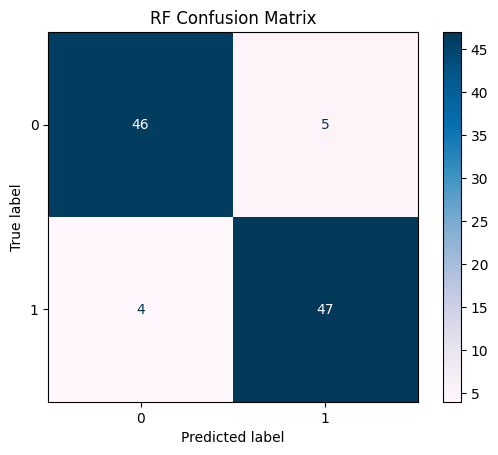

In [215]:
#confusion matrix using matplotlib
rf_cm = confusion_matrix(y_test,rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('RF Confusion Matrix')
plt.show()

In [216]:
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2'],
    'random_state': [0]
}

rf1 = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf1, cv=3, param_grid=parameters).fit(x_train, y_train)

In [217]:
y_pred_rf = rf_cv.predict(x_test)

In [218]:
print("Random Forest Accuracy:",accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:",precision_score(y_test, y_pred_rf))
print("Random Forest Recall:",recall_score(y_test, y_pred_rf))
print("Random Forest F1 Score:",f1_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:",confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9215686274509803
Random Forest Precision: 0.9056603773584906
Random Forest Recall: 0.9411764705882353
Random Forest F1 Score: 0.923076923076923
Random Forest Confusion Matrix: [[46  5]
 [ 3 48]]


## DT

In [219]:
dc_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dc_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [220]:
dc_pred = dc_clf.predict(x_test) # Make predictions on the test data

In [221]:
print("Decision Tree Accuracy:", accuracy_score(y_test,dc_pred))
print("Decision Tree Precision:",precision_score(y_test,dc_pred))
print("Decision Tree Recall:",recall_score(y_test,dc_pred))
print("Decision Tree F1 Score:",f1_score(y_test,dc_pred))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test,dc_pred))

Decision Tree Accuracy: 0.8529411764705882
Decision Tree Precision: 0.875
Decision Tree Recall: 0.8235294117647058
Decision Tree F1 Score: 0.8484848484848485
Decision Tree Confusion Matrix: [[45  6]
 [ 9 42]]


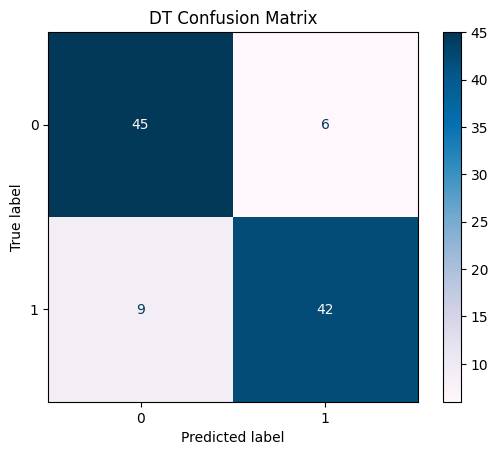

In [222]:
#confusion matrix using matplotlib
dc_cm = confusion_matrix(y_test,dc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dc_cm, display_labels=dc_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('DT Confusion Matrix')
plt.show()

In [223]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=3, param_grid=parameters).fit(x_train, y_train)

In [224]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(x_train, y_train)

In [225]:
y_pred_tree = tree.predict(x_test)

In [226]:
print("Decision Tree Accuracy:", accuracy_score(y_test,y_pred_tree))
print("Decision Tree Precision:",precision_score(y_test,y_pred_tree))
print("Decision Tree Recall:",recall_score(y_test,y_pred_tree))
print("Decision Tree F1 Score:",f1_score(y_test,y_pred_tree))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test,y_pred_tree))

Decision Tree Accuracy: 0.8529411764705882
Decision Tree Precision: 0.875
Decision Tree Recall: 0.8235294117647058
Decision Tree F1 Score: 0.8484848484848485
Decision Tree Confusion Matrix: [[45  6]
 [ 9 42]]


## NB

In [227]:
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [228]:
nb_pred = nb_clf.predict(x_test)

In [229]:
print("Naive Bayes Accuracy:",accuracy_score(y_test,nb_pred))
print("Naive Bayes Precision:",precision_score(y_test,nb_pred))
print("Naive Bayes Recall:",recall_score(y_test,nb_pred))
print("Naive Bayes F1 Score:",f1_score(y_test,nb_pred))
print("Naive Bayes Confusion Matrix:",confusion_matrix(y_test,nb_pred))

Naive Bayes Accuracy: 0.9019607843137255
Naive Bayes Precision: 0.9019607843137255
Naive Bayes Recall: 0.9019607843137255
Naive Bayes F1 Score: 0.9019607843137255
Naive Bayes Confusion Matrix: [[46  5]
 [ 5 46]]


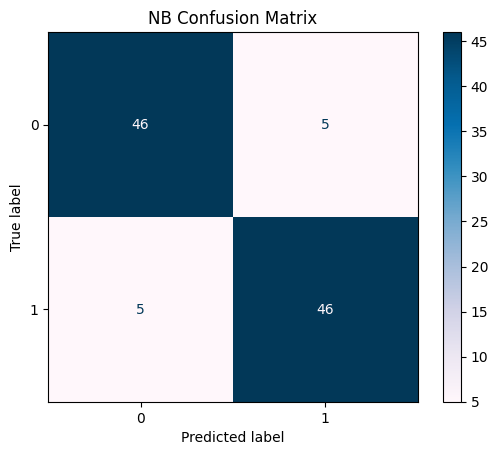

In [230]:
#confusion matrix using matplotlib
nb_cm = confusion_matrix(y_test,nb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

In [231]:
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=1000)
}
gnb = GaussianNB()
grid_search_nb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search_nb.fit(x_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 9.79469667e-01, 9.59360829e-01, 9.39664831e-01,
       9.20373200e-01, 9.01477631e-01, 8.82969996e-01, 8.64842328e-01,
       8.47086827e-01, 8.29695852e-01, 8.12661920e-01, 7.95977700e-01,
       7.79636013e-01, 7.63629826e-01, 7.47952252e-01, 7.32596543e-01,
       7.17556092e-01, 7.02824426e-01, 6.88...
       1.61141428e-09, 1.57833141e-09, 1.54592774e-09, 1.51418933e-09,
       1.48310251e-09, 1.45265393e-09, 1.42283046e-09, 1.39361927e-09,
       1.36500781e-09, 1.33698374e-09, 1.30953502e-09, 1.28264983e-09,
       1.25631660e-09, 1.23052400e-09, 1.20526094e-09, 1.18051653e-09,
       1.15628013e-09, 1.13254132e-09, 1.10928986e-09, 1.08651577e-09,
       1.06420924e-09, 1.04236067e-09, 1.02096066e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [232]:
best_gnb = GaussianNB(**grid_search_nb.best_params_).fit(x_train, y_train)

In [233]:
y_pred_nbb = best_gnb.predict(x_test)

In [234]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nbb))
print("Naive Bayes Precision:", precision_score(y_test, y_pred_nbb))
print("Naive Bayes Recall:", recall_score(y_test, y_pred_nbb))
print("Naive Bayes F1 Score:", f1_score(y_test, y_pred_nbb))
print("Naive Bayes Confusion Matrix:", confusion_matrix(y_test, y_pred_nbb))

Naive Bayes Accuracy: 0.9019607843137255
Naive Bayes Precision: 0.9019607843137255
Naive Bayes Recall: 0.9019607843137255
Naive Bayes F1 Score: 0.9019607843137255
Naive Bayes Confusion Matrix: [[46  5]
 [ 5 46]]


## LR

In [235]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[100,1000,10000]
}
logreg = LogisticRegression()
model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [236]:
anss=model.predict(x_test)
accuracy_test_lr=accuracy_score(anss,y_test)
precision_test_lr=precision_score(anss,y_test)
recall_test_lr=recall_score(anss,y_test)
f1_test_lr=f1_score(anss,y_test)

print("Testing Accuracy is ",accuracy_test_lr)
print("Testing Precision is ",precision_test_lr)
print("Testing recall is ",recall_test_lr)
print("Testing F1 is ",f1_test_lr)
print("LR Confusion Matrix:",confusion_matrix(anss,y_test))

Testing Accuracy is  0.8823529411764706
Testing Precision is  0.8627450980392157
Testing recall is  0.8979591836734694
Testing F1 is  0.8799999999999999
LR Confusion Matrix: [[46  7]
 [ 5 44]]


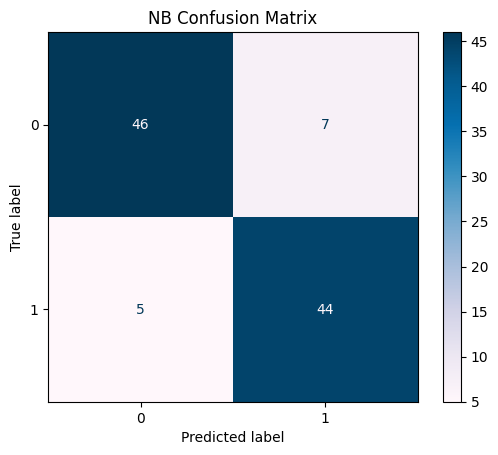

In [237]:
#confusion matrix using matplotlib
lr_cm = confusion_matrix(anss,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=model.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

In [238]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=3).fit(x_train, y_train)

In [239]:
lr = LogisticRegression(**lr_cv.best_params_).fit(x_train, y_train)

In [240]:
y_pred_lr = lr.predict(x_test)

In [241]:
print("LR Accuracy:", accuracy_score(y_test, y_pred_lr))
print("LR Precision:",precision_score(y_test, y_pred_lr))
print("LR Recall:",recall_score(y_test, y_pred_lr))
print("LR F1 Score:",f1_score(y_test, y_pred_lr))
print("LR Confusion Matrix:", confusion_matrix(y_test, y_pred_lr))

LR Accuracy: 0.8725490196078431
LR Precision: 0.8958333333333334
LR Recall: 0.8431372549019608
LR F1 Score: 0.8686868686868686
LR Confusion Matrix: [[46  5]
 [ 8 43]]


## XGBoost

In [242]:
# Create and train the XGBoost model with normalized data
model2 = xgb.XGBClassifier(reg_alpha=2.0, max_depth=2, min_child_weight=5.0,min_samples_leaf= 2,random_state=0)
model2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=5.0, min_samples_leaf=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [243]:
acc2 = model2.predict(x_test)

In [244]:
accuracy_xgb_test=accuracy_score(acc2,y_test)
precision_xgb_test=precision_score(acc2,y_test)
recall_xgb_test=recall_score(acc2,y_test)
f1_xgb_test=f1_score(acc2,y_test)

print("Testing Accuracy is ",accuracy_xgb_test)
print("Testing Precision is ",precision_xgb_test)
print("Testing recall is ",recall_xgb_test)
print("Testing F1 is ",f1_xgb_test)
print("xgb Confusion Matrix:",confusion_matrix(acc2,y_test))

Testing Accuracy is  0.9215686274509803
Testing Precision is  0.8823529411764706
Testing recall is  0.9574468085106383
Testing F1 is  0.9183673469387754
xgb Confusion Matrix: [[49  6]
 [ 2 45]]


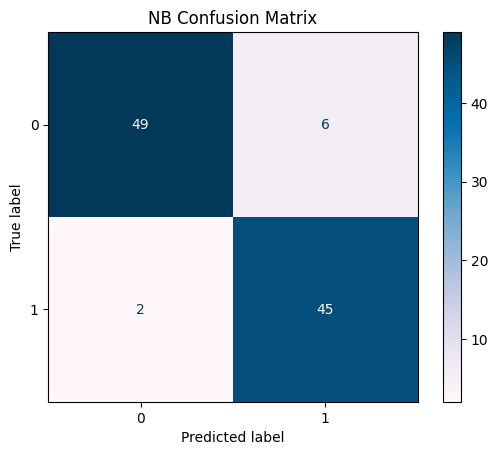

In [245]:
#confusion matrix using matplotlib
xgb_cm = confusion_matrix(acc2,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=model2.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

In [246]:
xgb = xgb.XGBClassifier(random_state=0)
# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [247]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [248]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:", conf_matrix)
print("Classification Report:", class_report)

Accuracy: 0.8921568627450981
Confusion Matrix: [[47  4]
 [ 7 44]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.92      0.90        51
           1       0.92      0.86      0.89        51

    accuracy                           0.89       102
   macro avg       0.89      0.89      0.89       102
weighted avg       0.89      0.89      0.89       102



## MLP

In [249]:
model3 = MLPClassifier(hidden_layer_sizes=
                       (50,),random_state=1)
model3.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), random_state=1)

In [250]:
y_pred_t = model3.predict(x_test)
acc_mlp_t  = accuracy_score(y_pred_t,y_test)
precision_mlp_t=precision_score(y_pred_t,y_test)
recall_mlp_t=recall_score(y_pred_t,y_test)
f1_mlp_t=f1_score(y_pred_t,y_test)
mlp_cm = confusion_matrix(y_pred_t,y_test)

print("Testing Accuracy is ",acc_mlp_t)
print("Testing Precision is ",precision_mlp_t)
print("Testing recall is ",recall_mlp_t)
print("Testing F1 is ",f1_mlp_t)
print("MLP Confusion Matrix",mlp_cm)

Testing Accuracy is  0.8725490196078431
Testing Precision is  0.8823529411764706
Testing recall is  0.8653846153846154
Testing F1 is  0.8737864077669903
MLP Confusion Matrix [[44  6]
 [ 7 45]]


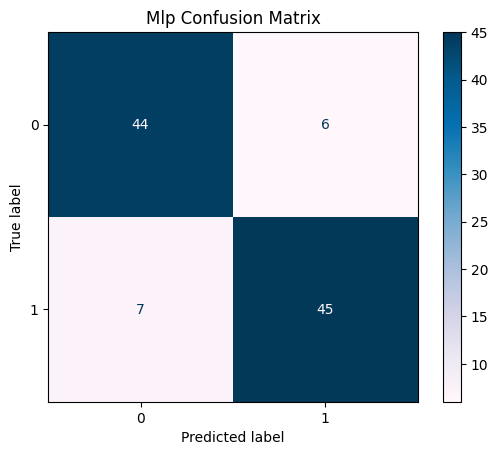

In [251]:
#confusion matrix using matplotlib
mlp_cm = confusion_matrix(y_pred_t,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=model3.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Mlp Confusion Matrix')
plt.show()

## SVM

In [252]:
classifier = svm.SVC(kernel='linear', gamma='auto',C=2, probability=True)
classifier.fit(x_train,y_train)

Y_predict = classifier.predict(x_test)

In [253]:
print("SVM Accuracy:",accuracy_score(y_test,Y_predict))
print("SVM Precision:",precision_score(y_test,Y_predict))
print("SVM Forest Recall:",recall_score(y_test,Y_predict))
print("SVM Forest F1 Score:",f1_score(y_test,Y_predict))
print("SVM Confusion Matrix:",confusion_matrix(y_test,Y_predict))

SVM Accuracy: 0.8921568627450981
SVM Precision: 0.8846153846153846
SVM Forest Recall: 0.9019607843137255
SVM Forest F1 Score: 0.8932038834951457
SVM Confusion Matrix: [[45  6]
 [ 5 46]]


In [254]:
#confusion matrix
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test,Y_predict)
svm_cm

array([[45,  6],
       [ 5, 46]])

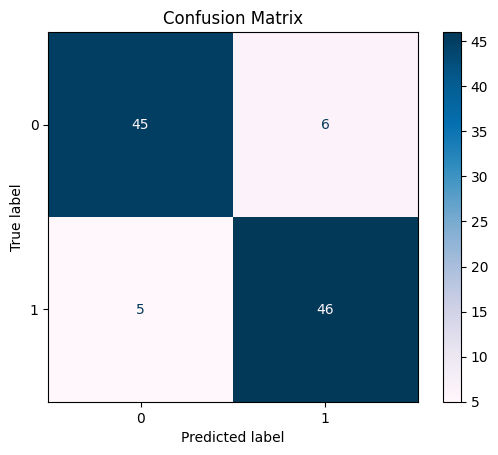

In [255]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [256]:
from sklearn.svm import SVC

In [257]:
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=3).fit(x_train, y_train)

In [258]:
svc = SVC(**svc_cv.best_params_).fit(x_train, y_train)

In [259]:
y_pred_svc = svc.predict(x_test)

In [260]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVM Precision:", precision_score(y_test ,y_pred_svc))
print("SVM Forest Recall:", recall_score(y_test, y_pred_svc))
print("SVM Forest F1 Score:", f1_score(y_test, y_pred_svc))
print("SVM Confusion Matrix:", confusion_matrix(y_test, y_pred_svc))

SVM Accuracy: 0.8823529411764706
SVM Precision: 0.8679245283018868
SVM Forest Recall: 0.9019607843137255
SVM Forest F1 Score: 0.8846153846153846
SVM Confusion Matrix: [[44  7]
 [ 5 46]]


## KNN

In [261]:
#When K = 5

#KNN MODEL building

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier = knn_classifier.fit(x_train,y_train)


#prediction

Y_predk = knn_classifier.predict(x_test)

print("KNN Accuracy:",accuracy_score(y_test,Y_predk))
print("KNN Precision:",precision_score(y_test,Y_predk))
print("KNN Recall:",recall_score(y_test,Y_predk))
print("KNN F1 Score:",f1_score(y_test,Y_predk))
print("KNN Confusion matrix:",confusion_matrix(y_test,Y_predk))

KNN Accuracy: 0.8921568627450981
KNN Precision: 0.9166666666666666
KNN Recall: 0.8627450980392157
KNN F1 Score: 0.888888888888889
KNN Confusion matrix: [[47  4]
 [ 7 44]]


In [262]:
knn_cm = confusion_matrix(y_test,Y_predk)
knn_cm

array([[47,  4],
       [ 7, 44]])

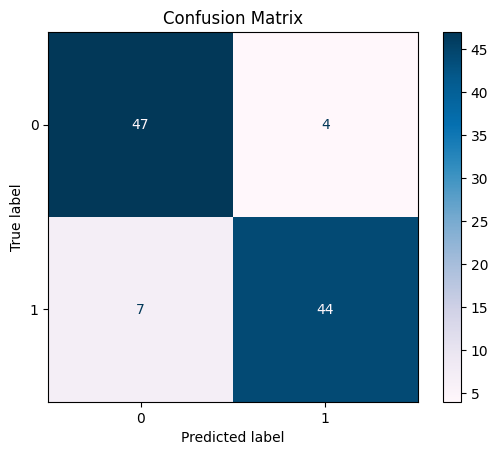

In [263]:
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [264]:
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4, 5, 6]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=3, param_grid=parameters).fit(x_train, y_train)

In [265]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(x_train, y_train)

In [266]:
y_pred_knn = knn.predict(x_test)

In [267]:
print("KNN Accuracy:",accuracy_score(y_test, y_pred_knn))
print("KNN Precision:",precision_score(y_test, y_pred_knn))
print("KNN Forest Recall:",recall_score(y_test, y_pred_knn))
print("KNN Forest F1 Score:",f1_score(y_test, y_pred_knn))

KNN Accuracy: 0.9313725490196079
KNN Precision: 0.9782608695652174
KNN Forest Recall: 0.8823529411764706
KNN Forest F1 Score: 0.9278350515463919


## GB

In [268]:
# Create the Gradient Boosting classifier
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001],
    'max_depth': [5],
    'min_samples_split': [30],
    'min_samples_leaf': [1],
    'random_state': [0]
}

# Instantiate the GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_classifier = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Train the classifier on the training data
gb_classifier.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001], 'max_depth': [5],
                         'min_samples_leaf': [1], 'min_samples_split': [30],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [269]:
# Make predictions on the test data
Y_pred2 = gb_classifier.predict(x_test)

In [270]:
print("GB Accuracy:",accuracy_score(y_test,Y_pred2))
print("GB Precision:",precision_score(y_test,Y_pred2))
print("GB Forest Recall:",recall_score(y_test,Y_pred2))
print("GB Forest F1 Score:",f1_score(y_test,Y_pred2))

GB Accuracy: 0.8627450980392157
GB Precision: 0.8775510204081632
GB Forest Recall: 0.8431372549019608
GB Forest F1 Score: 0.86


In [271]:
#confusion matrix

cm = confusion_matrix(y_test,Y_pred2)
cm

array([[45,  6],
       [ 8, 43]])

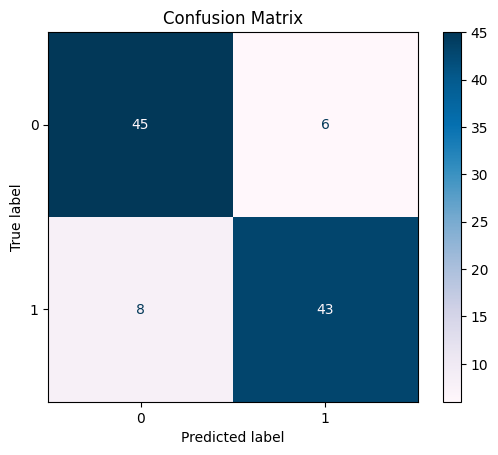

In [272]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [273]:
final_data = pd.DataFrame({'Models':['LR','RF','NB','DT','SVM','KNN','GB','MLP','XGB'],'ACC':[
    accuracy_score(anss,y_test),
    accuracy_score(y_test,rf_pred),
    accuracy_score(y_test,nb_pred),
    accuracy_score(y_test,dc_pred),
   accuracy_score(y_test, Y_predict),
   accuracy_score(y_test, Y_predk),
   accuracy_score(y_test, Y_pred2),
  accuracy_score(y_pred_t,y_test),
  accuracy_score(acc2,y_test)
                                                                                 ]})


In [274]:
final_data

,Models,ACC
0,LR,0.882353
1,RF,0.911765
2,NB,0.901961
3,DT,0.852941
4,SVM,0.892157
5,KNN,0.892157
6,GB,0.862745
7,MLP,0.872549
8,XGB,0.921569


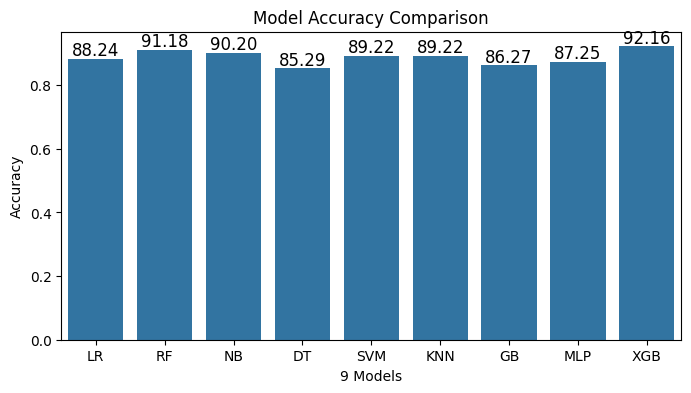

In [275]:
# Plotting the bar chart using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title('Model Accuracy Comparison')
plt.xlabel('9 Models')
plt.ylabel('Accuracy')
for index, row in final_data.iterrows():
    plt.text(index, row['ACC'] + 0.01, f'{row["ACC"]*100:.2f}', ha='center', fontsize=12)
plt.show()

In [276]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

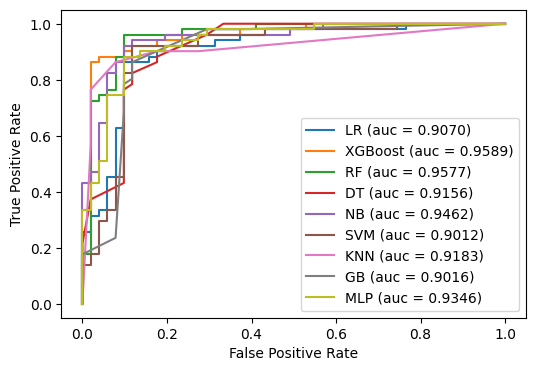

LR AUC: 0.9070
XGB AUC: 0.9589
RF AUC: 0.9577
DT AUC: 0.9156
NB AUC: 0.9462
SVM AUC: 0.9012
KNN AUC: 0.9183
GB AUC: 0.9016
MLP AUC: 0.9346


In [277]:
#ROC
# LR
y_prob_lr = model.predict_proba(x_test)[:, 1]
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# XGBoost
y_prob_xgb = model2.predict_proba(x_test)[:, 1]
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# RF
y_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(rf_fpr, rf_tpr)

# DT
y_prob_dt = dc_clf.predict_proba(x_test)[:, 1]
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)


# NB
y_prob_nb = nb_clf.predict_proba(x_test)[:, 1]
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(nb_fpr, nb_tpr)

# SVM
y_prob_svm = classifier.predict_proba(x_test)[:, 1]
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(svm_fpr, svm_tpr)

# KNN
y_prob_knn = knn_classifier.predict_proba(x_test)[:, 1]
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(knn_fpr, knn_tpr)

# GB
y_prob_gb = gb_classifier.predict_proba(x_test)[:, 1]
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(gb_fpr, gb_tpr)

# MLP
y_prob_mlp = model3.predict_proba(x_test)[:, 1]
mlp_fpr, mlp_tpr, thresholds = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# RF
# y_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
# rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_prob_rf)
# roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='LR (auc = %0.4f)' % roc_auc_lr)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGBoost (auc = %0.4f)' % roc_auc_xgb)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.4f)' % roc_auc_rf)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.4f)' % roc_auc_dt)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='NB (auc = %0.4f)' % roc_auc_nb)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.4f)' % roc_auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.4f)' % roc_auc_knn)
plt.plot(gb_fpr, gb_tpr, linestyle='-', label='GB (auc = %0.4f)' % roc_auc_gb)
plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label='MLP (auc = %0.4f)' % roc_auc_mlp)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('LR AUC: {:.4f}'.format(roc_auc_lr))
print('XGB AUC: {:.4f}'.format(roc_auc_xgb))
print('RF AUC: {:.4f}'.format(roc_auc_rf))
print('DT AUC: {:.4f}'.format(roc_auc_dt))
print('NB AUC: {:.4f}'.format(roc_auc_nb))
print('SVM AUC: {:.4f}'.format(roc_auc_svm))
print('KNN AUC: {:.4f}'.format(roc_auc_knn))
print('GB AUC: {:.4f}'.format(roc_auc_gb))
print('MLP AUC: {:.4f}'.format(roc_auc_mlp))